In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [3]:
data=pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [4]:
data.head(4)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='bmi', ylabel='stroke'>

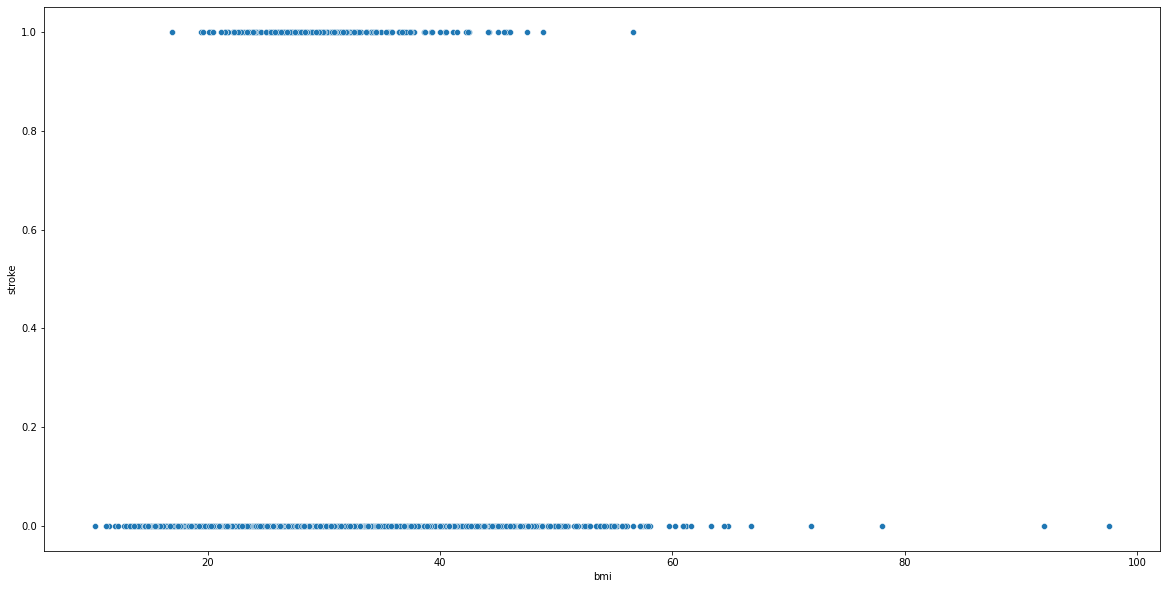

In [8]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="bmi",y="stroke",data=data)

# **Filling null values in BMI**

In [9]:
bmi_stroke=data[data["stroke"]==1]

In [10]:
bmi_stroke["bmi"].mean()

30.471291866028707

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

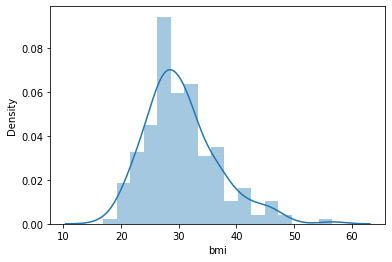

In [11]:
sns.distplot(bmi_stroke["bmi"])

In [12]:
bmi_stroke["bmi"].describe()

count    209.000000
mean      30.471292
std        6.329452
min       16.900000
25%       26.400000
50%       29.700000
75%       33.700000
max       56.600000
Name: bmi, dtype: float64

In [13]:
std_stroke=6.329452
mean_S=30.471292
no_outlierbmi_stroke=bmi_stroke[(bmi_stroke["bmi"]<mean_S+3*std_stroke) & (bmi_stroke["bmi"]>mean_S+3*-std_stroke) ]

In [14]:
outlierbmi_stroke=bmi_stroke[(bmi_stroke["bmi"]>mean_S+3*std_stroke) | (bmi_stroke["bmi"]<mean_S+3*-std_stroke) ]

In [15]:
len(outlierbmi_stroke)

1

In [16]:
outlierbmi_stroke_ind=outlierbmi_stroke.index

In [17]:
stroke_mean_bmi=no_outlierbmi_stroke["bmi"].mean()
stroke_mean_bmi

30.345673076923074

In [18]:
bmi_no_stroke=data[data["stroke"]==0]

In [19]:
bmi_no_stroke["bmi"].mean()

28.823063829787234

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

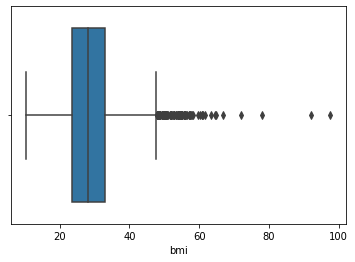

In [20]:
sns.boxplot(bmi_no_stroke["bmi"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

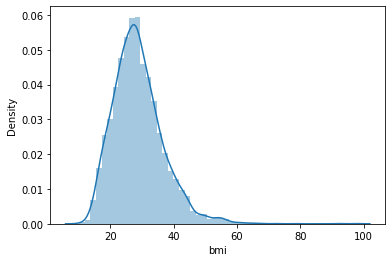

In [21]:
sns.distplot(bmi_no_stroke["bmi"])

In [22]:
bmi_no_stroke["bmi"].describe()

count    4700.000000
mean       28.823064
std         7.908287
min        10.300000
25%        23.400000
50%        28.000000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

## **Removing outliers**

In [23]:
sd=7.908287
mean=28.823064

no_outlierbmi_no_stroke=bmi_no_stroke[(bmi_no_stroke["bmi"]<mean+3*sd) & (bmi_no_stroke["bmi"]>mean+3*-sd) ]

In [24]:
outlier_index=bmi_no_stroke[(bmi_no_stroke["bmi"]>mean+3*sd) | (bmi_no_stroke["bmi"]<mean+3*-sd) ].index

In [25]:
outlier_index

Int64Index([ 258,  270,  333,  358,  430,  466,  544,  637,  662,  672,  715,
             761,  928, 1061, 1077, 1304, 1322, 1532, 1559, 1564, 1584, 1595,
            1660, 1898, 2071, 2081, 2128, 2136, 2330, 2441, 2545, 2555, 2567,
            2764, 2815, 2840, 3060, 3243, 3508, 3588, 3688, 3702, 3825, 3909,
            3931, 3980, 4154, 4188, 4209, 4225, 4351, 4407, 4475, 4838, 4906,
            4952],
           dtype='int64')

In [26]:
len(no_outlierbmi_no_stroke)

4644

In [27]:
bmi_mean_no_S=no_outlierbmi_no_stroke["bmi"].mean()

In [28]:
bmi_mean_no_S

28.465848406546087

In [29]:
print("Stroke BMI mean:{:.2f}\nNon Stroke BMI mean:{:.2f}".format(stroke_mean_bmi,bmi_mean_no_S))


Stroke BMI mean:30.35
Non Stroke BMI mean:28.47


In [30]:
outlierbmi_stroke_ind
outlier_index

Int64Index([ 258,  270,  333,  358,  430,  466,  544,  637,  662,  672,  715,
             761,  928, 1061, 1077, 1304, 1322, 1532, 1559, 1564, 1584, 1595,
            1660, 1898, 2071, 2081, 2128, 2136, 2330, 2441, 2545, 2555, 2567,
            2764, 2815, 2840, 3060, 3243, 3508, 3588, 3688, 3702, 3825, 3909,
            3931, 3980, 4154, 4188, 4209, 4225, 4351, 4407, 4475, 4838, 4906,
            4952],
           dtype='int64')

In [31]:
data.drop(index=outlier_index,inplace=True)

In [32]:
data.drop(index=outlierbmi_stroke_ind,inplace=True)

In [33]:
data.reset_index(drop=True,inplace=True)

In [34]:
len(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5053 non-null   int64  
 1   gender             5053 non-null   object 
 2   age                5053 non-null   float64
 3   hypertension       5053 non-null   int64  
 4   heart_disease      5053 non-null   int64  
 5   ever_married       5053 non-null   object 
 6   work_type          5053 non-null   object 
 7   Residence_type     5053 non-null   object 
 8   avg_glucose_level  5053 non-null   float64
 9   bmi                4852 non-null   float64
 10  smoking_status     5053 non-null   object 
 11  stroke             5053 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 473.8+ KB


In [35]:

for index,i in enumerate(data["stroke"]):
    if i ==1:
        if pd.isnull(data.iloc[index,-3])==True:
            data.iloc[index,-3]=stroke_mean_bmi
            
    if i==0:
        if pd.isnull(data.iloc[index,-3])==True:
            data.iloc[index,-3]=bmi_mean_no_S

    


In [36]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5053 non-null   int64  
 1   gender             5053 non-null   object 
 2   age                5053 non-null   float64
 3   hypertension       5053 non-null   int64  
 4   heart_disease      5053 non-null   int64  
 5   ever_married       5053 non-null   object 
 6   work_type          5053 non-null   object 
 7   Residence_type     5053 non-null   object 
 8   avg_glucose_level  5053 non-null   float64
 9   bmi                5053 non-null   float64
 10  smoking_status     5053 non-null   object 
 11  stroke             5053 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 473.8+ KB


In [37]:
# data["bmi"].fillna(data["bmi"].mean(),inplace=True)

In [38]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.345673,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [39]:
data.nunique()

id                   5053
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3938
bmi                   379
smoking_status          4
stroke                  2
dtype: int64

In [40]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.00000,5053.000000
mean,36586.140313,43.197111,0.095587,0.054423,105.989141,28.55811,0.049080
std,21117.316837,22.693316,0.294053,0.226873,45.094805,7.01485,0.216056
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17860.000000,25.000000,0.000000,0.000000,77.260000,23.70000,0.000000
50%,37025.000000,45.000000,0.000000,0.000000,91.880000,28.30000,0.000000
75%,54724.000000,61.000000,0.000000,0.000000,113.960000,32.60000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,52.50000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='avg_glucose_level'>

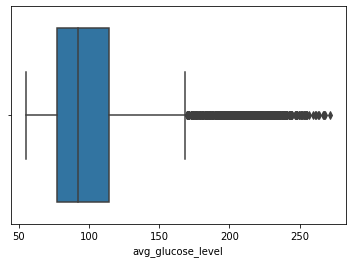

In [41]:
sns.boxplot(data["avg_glucose_level"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

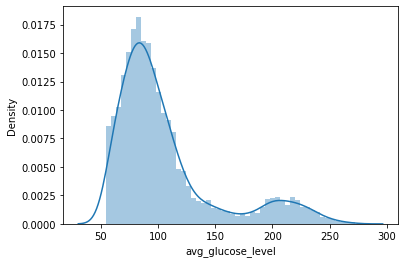

In [42]:
sns.distplot(data["avg_glucose_level"])

In [43]:
std_glucose=45.094805
mean_glucose=105.989141

nooutlier_data=data[(data["avg_glucose_level"]<mean_glucose+3*std_glucose) & (data["avg_glucose_level"]>mean_glucose+3*-std_glucose)]

In [44]:
df=nooutlier_data.reset_index(drop=True)

In [45]:
# df=data

# EDA

([<matplotlib.patches.Wedge at 0x7f1fd26e5490>,
 [Text(-0.02831134618141599, 1.0996356067704411, 'Urban'),
  Text(0.028311346181415852, -1.0996356067704411, 'Rural')],
 [Text(-0.015442552462590537, 0.5998012400566042, '50.82%'),
  Text(0.015442552462590462, -0.5998012400566042, '49.18%')])

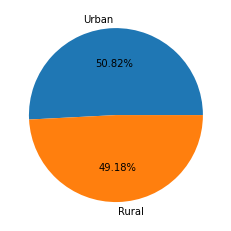

In [46]:
plt.pie(x=df["Residence_type"].value_counts(),
        labels=[df["Residence_type"].value_counts().index[0],df["Residence_type"].value_counts().index[1]],
        autopct='%1.2f%%'
    
   )

In [47]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.345673,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


([<matplotlib.patches.Wedge at 0x7f1fd26bddd0>,
 [Text(0.438433985850787, 1.0088486705403303, 'never smoked'),
  Text(-1.0895243070443774, -0.1514489496809707, 'Unknown'),
  Text(0.07314942606958774, -1.0975651057981435, 'formerly smoked'),
  Text(0.9749135494932197, -0.5094541893188547, 'smokes')],
 [Text(0.23914581046406563, 0.5502810930219983, '36.95%'),
  Text(-0.5942859856605694, -0.08260851800780218, '30.50%'),
  Text(0.039899686947047854, -0.5986718758898965, '17.23%'),
  Text(0.5317710269963016, -0.2778841032648298, '15.33%')])

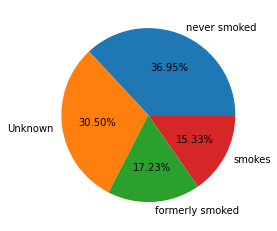

In [48]:
plt.pie(x=df["smoking_status"].value_counts(),
        labels=[df["smoking_status"].value_counts().index[0],df["smoking_status"].value_counts().index[1],df["smoking_status"].value_counts().index[2],
               df["smoking_status"].value_counts().index[3]],
        autopct='%1.2f%%'
    
   )

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

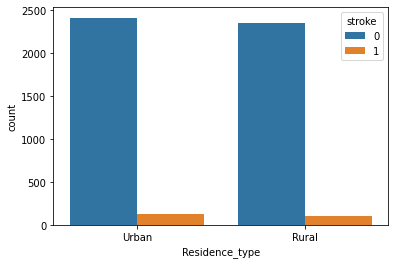

In [49]:

sns.countplot(x="Residence_type",hue="stroke",data=df)


<AxesSubplot:xlabel='stroke', ylabel='count'>

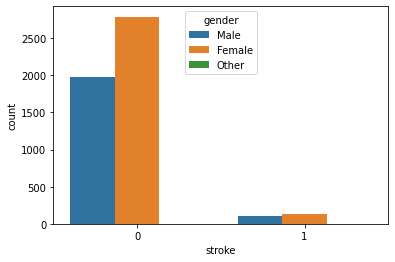

In [50]:
sns.countplot(x="stroke",hue="gender",data=df)


In [51]:
df["gender"].value_counts()

Female    2926
Male      2077
Other        1
Name: gender, dtype: int64

In [52]:
df["work_type"].value_counts()

Private          2856
Self-employed     798
children          687
Govt_job          641
Never_worked       22
Name: work_type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1fd0466850>,
 [Text(-0.2424639840914444, 1.0729451134230976, 'Private'),
  Text(-0.6438791937093813, -0.8918629849411608, 'Self-employed'),
  Text(0.33242238692764575, -1.0485682413030288, 'children'),
  Text(0.9998374087771944, -0.4586122065642232, 'Govt_job'),
  Text(1.0998950751748309, -0.015192880113835018, 'Never_worked')],
 [Text(-0.13225308223169693, 0.5852427891398714, '57.07%'),
  Text(-0.3512068329323898, -0.4864707190588149, '15.95%'),
  Text(0.18132130196053403, -0.5719463134380156, '13.73%'),
  Text(0.5453658593330151, -0.2501521126713944, '12.81%'),
  Text(0.5999427682771804, -0.008287025516637282, '0.44%')])

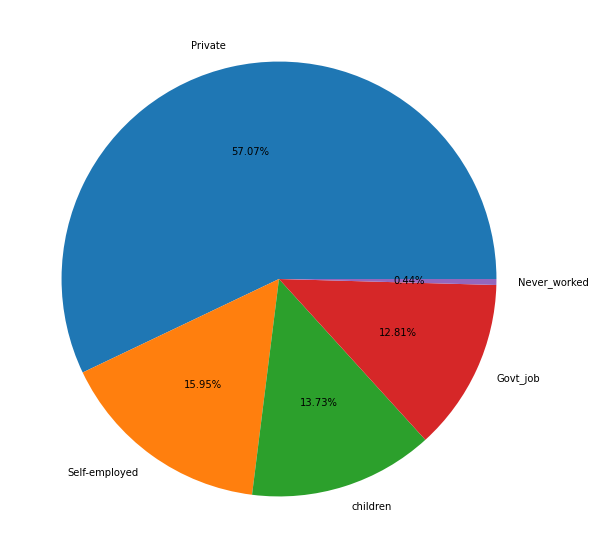

In [53]:
plt.figure(figsize=(10,10))
plt.pie(x=df["work_type"].value_counts(),
        labels=[df["work_type"].value_counts().index[0],df["work_type"].value_counts().index[1],
        df["work_type"].value_counts().index[2],df["work_type"].value_counts().index[3],
                df["work_type"].value_counts().index[4]],
        autopct='%1.2f%%'
    
   )

<AxesSubplot:>

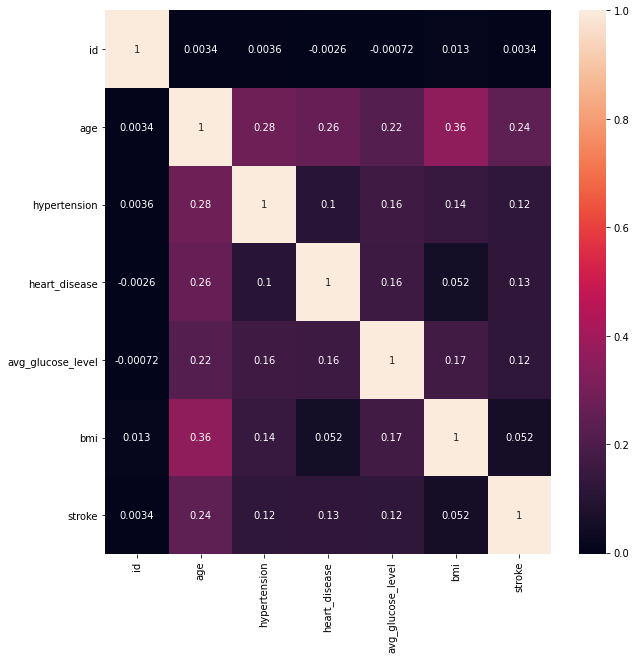

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

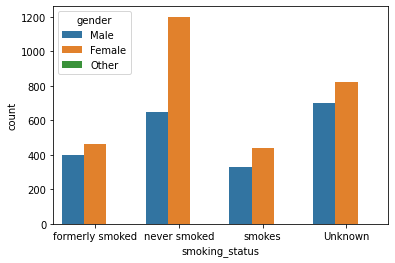

In [55]:
sns.countplot(x="smoking_status",hue="gender",data=df)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

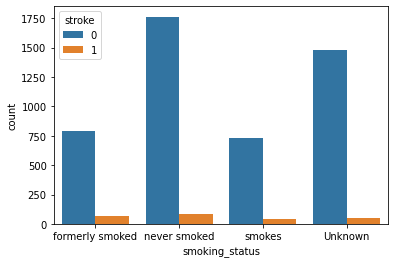

In [56]:
sns.countplot(x="smoking_status",hue="stroke",data=df)

In [57]:
df["stroke"].value_counts()

0    4765
1     239
Name: stroke, dtype: int64

In [58]:
finaldata=df.drop(index=df[df["gender"]=="Other"].index)

In [59]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 0 to 5003
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5003 non-null   int64  
 1   gender             5003 non-null   object 
 2   age                5003 non-null   float64
 3   hypertension       5003 non-null   int64  
 4   heart_disease      5003 non-null   int64  
 5   ever_married       5003 non-null   object 
 6   work_type          5003 non-null   object 
 7   Residence_type     5003 non-null   object 
 8   avg_glucose_level  5003 non-null   float64
 9   bmi                5003 non-null   float64
 10  smoking_status     5003 non-null   object 
 11  stroke             5003 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 508.1+ KB


In [60]:
finaldata.reset_index(drop=True,inplace=True)


In [61]:
ever_married=pd.get_dummies(finaldata["ever_married"],drop_first=True)
work_type=pd.get_dummies(finaldata["work_type"],drop_first=True)
Residence_type=pd.get_dummies(finaldata["Residence_type"],drop_first=True)
gender=pd.get_dummies(finaldata["gender"],drop_first=True)
smoking_status=pd.get_dummies(finaldata["smoking_status"],drop_first=True)

In [62]:
finaldata["married"]=ever_married
finaldata[smoking_status.columns]=smoking_status

In [63]:
finaldata[work_type.columns]=work_type

In [64]:
finaldata[Residence_type.columns]=Residence_type
finaldata[gender.columns]=gender


In [65]:
finaldata

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,married,formerly smoked,never smoked,smokes,Never_worked,Private,Self-employed,children,Urban,Male
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,1,1,0,0,0,1,0,0,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.345673,...,1,0,1,0,0,0,1,0,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,1,0,1,0,0,1,0,0,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,1,0,0,1,0,1,0,0,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.465848,...,1,0,1,0,0,1,0,0,1,0
4999,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,...,1,0,1,0,0,0,1,0,1,0
5000,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,...,1,0,1,0,0,0,1,0,0,0
5001,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,...,1,1,0,0,0,1,0,0,0,1


<AxesSubplot:>

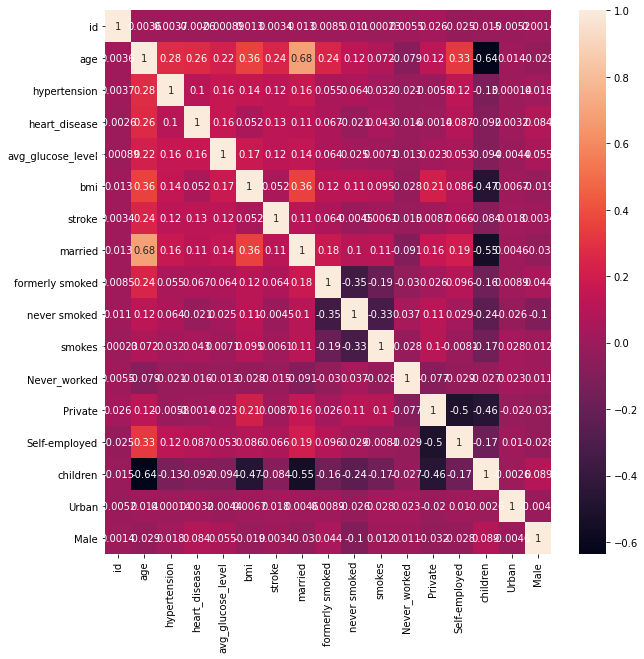

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(finaldata.corr(),annot=True)

In [67]:
X=finaldata.drop(columns=["id","gender","ever_married","work_type","Residence_type","smoking_status","stroke"])

In [68]:
X.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,married,formerly smoked,never smoked,smokes,Never_worked,Private,Self-employed,children,Urban,Male
0,67.0,0,1,228.69,36.600000,1,1,0,0,0,1,0,0,1,1
1,61.0,0,0,202.21,30.345673,1,0,1,0,0,0,1,0,0,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,0,0,1
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,0,1,0,0,0


In [69]:
X.shape

(5003, 15)

In [70]:
Y=finaldata[["stroke"]].values


# STANDARD SCALING

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
xs=StandardScaler()

XY=xs.fit_transform(X)


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [75]:
xtrains=xs.fit_transform(xtrain)
xtests=xs.transform(xtest)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier


In [77]:
models={
    "LogisticRegression":LogisticRegression(solver='liblinear'),
    "SVC":SVC(),
    "LinearSVC":LinearSVC(),
    "KNeighborsClassifier":KNeighborsClassifier()
    
    
    
}

In [78]:
from sklearn.metrics import accuracy_score


In [79]:
classifiers=[]
scores=[]

In [80]:
for model in models.keys():
    mod=models[model]
    mod.fit(xtrains,ytrain.ravel())
    classifiers.append(model)
    scores.append(accuracy_score(ytest,mod.predict(xtests))*100)
    print("{} : {:.2f}%".format(model,accuracy_score(ytest,mod.predict(xtests))*100))

LogisticRegression : 95.40%
SVC : 95.40%
LinearSVC : 95.40%


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


KNeighborsClassifier : 95.34%


In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
clss=RandomForestClassifier()

In [83]:
clss.fit(xtrain,ytrain.ravel())

RandomForestClassifier()

In [84]:
acc=clss.predict(xtest)

In [85]:
accuracy_score(ytest,acc)

0.9526982011992006

In [86]:
classifiers.append("RandomForest")
scores.append(accuracy_score(ytest,acc)*100)

In [87]:
len(classifiers)


5

In [88]:
pd.DataFrame({"models":classifiers,"Scores":scores})

,models,Scores
0,LogisticRegression,95.403065
1,SVC,95.403065
2,LinearSVC,95.403065
3,KNeighborsClassifier,95.336442
4,RandomForest,95.269820


In [89]:
from sklearn.model_selection import StratifiedKFold

In [90]:
skfcv=StratifiedKFold(5)

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
# for train_index, test_index in skfcv.split(X,Y):
#     xtrainsf,ytrainsf=X[train_index,:],Y[train_index,:]
#     xtestsf,ytestsf=X.iloc[test_index,:],Y.iloc[test_index,:]
#     clss.fit(xtrainsf,ytrainsf)
#     clss.predict(xtestsf)
#     print("accuracy :",accuracy_score(ytestsf,clss.predict(xtestsf)))

In [93]:
clss1=SVC()

In [94]:
result=cross_val_score(clss1,X,Y,cv=skfcv)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

In [95]:
result.mean()



0.9522287712287711

In [101]:
params={
    "C":[1,5],
    "kernel":["linear", "poly", "rbf", "sigmoid"],
    "degree":[2,3,4,5],
    "gamma":["scale","auto"]
    
}

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [107]:
GSCV=RandomizedSearchCV(clss1,params,cv=3,verbose=3,n_jobs=-1,n_iter=5)

In [108]:
GSCV.fit(X,Y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [1, 5], 'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=3)

In [110]:
GSCV.best_score_

0.9522287389044973

In [111]:
GSCV.best_score_

0.9522287389044973

In [112]:
GSCV.best_estimator_

SVC(C=5, degree=2, kernel='linear')

In [113]:
gparams={"C":[4,5,6],
         "kernel":['linear']
    
}

In [116]:
gsCV=GridSearchCV(clss1,gparams,cv=5,verbose=3)

In [117]:
gsCV.fit(X,Y.ravel())

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .............................C=4, kernel=linear; total time=  55.1s
[CV 2/5] END .............................C=4, kernel=linear; total time= 1.0min
[CV 3/5] END .............................C=4, kernel=linear; total time= 1.2min
[CV 4/5] END .............................C=4, kernel=linear; total time=  54.9s
[CV 5/5] END .............................C=4, kernel=linear; total time=  59.4s
[CV 1/5] END .............................C=5, kernel=linear; total time= 1.1min
[CV 2/5] END .............................C=5, kernel=linear; total time= 1.1min
[CV 3/5] END .............................C=5, kernel=linear; total time= 1.0min
[CV 4/5] END .............................C=5, kernel=linear; total time=  54.3s
[CV 5/5] END .............................C=5, kernel=linear; total time= 1.1min
[CV 1/5] END .............................C=6, kernel=linear; total time= 1.1min
[CV 2/5] END .............................C=6, ke

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [4, 5, 6], 'kernel': ['linear']}, verbose=3)

In [118]:
gsCV.best_estimator_

SVC(C=4, kernel='linear')

In [119]:
gsCV.best_score_

0.9522287712287711

In [120]:
finalmodel=SVC(C=4, kernel='linear')

In [122]:
finalmodel.fit(xtrain,ytrain.ravel())

SVC(C=4, kernel='linear')

In [125]:
accuracy_score(ytest,finalmodel.predict(xtest))

0.9540306462358428